# PyTorch inference

## IMPORTANT!
**Before you start this notebook, please shutdown other notebook kernels to allocate enough memory for this notebook.**  
<img src="./doc/kernel_shutdown.jpg" width="480">

## Prepare model and input image

Define a function to download a file.

In [ ]:
import urllib
import os

def download_file(url, file=None):
    if file is None:
        file = os.path.basename(url)
    if os.path.exists(file):
        return file
    try:
        urllib.URLopener().retrieve(url, file)
    except:
        urllib.request.urlretrieve(url, file)
    return file

Specify a input image file.

In [ ]:
image_file = 'bellpepper.jpg'
#image_file = download_file('https://github.com/pytorch/hub/raw/master/dog.jpg')
#image_file = download_file('https://upload.wikimedia.org/wikipedia/commons/b/b5/Canadian_Golden_Retriever.jpeg')

Download the ImageNet class file.

In [ ]:
class_file = download_file('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')

Parse the class file and convert it to a Python dictionary.

In [ ]:
import json
class_dict = json.load(open(class_file, 'r'))

Define the batch size for inference

In [ ]:
batch_size = 8

Export the input image file to PyTorch tensor and normlize it in the ImageNet training image conditions.

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


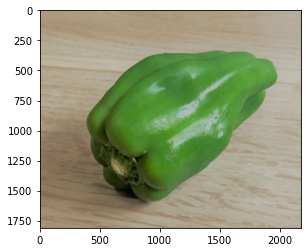

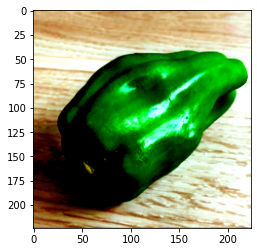

In [6]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

input_image = Image.open(image_file)
plt.imshow(input_image)
plt.show()

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
# input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
input_batch = torch.cat([input_tensor.unsqueeze(0)] * batch_size)

filtered_image = input_tensor.clone()
filtered_image = filtered_image.numpy().transpose((1, 2, 0))
filtered_image = np.float32(filtered_image)
filtered_image = np.clip(filtered_image, 0, 1)
plt.imshow(filtered_image)
plt.show()

Download the Torchvision AlexNet pre-traind model.

In [7]:
from torchvision import models
# net = models.alexnet(pretrained=True)
net = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
net.eval()
print(net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Do inference by PyTorch

Inference on CPU

In [8]:
import torch

with torch.no_grad():
    outputs = net(input_batch)

outputs = outputs.cpu()
outputs = outputs.detach().numpy()
for b in range(batch_size):
    print('image{}:'.format(b))
    idxlist = np.argsort(outputs[b])[:-4:-1]
    for i in idxlist:
        print('\t{}:\t{}'.format(class_dict[str(i)][1], outputs[b][i]))

image0:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image1:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image2:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image3:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image4:
	bell_pepper:	15.869134902954102
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image5:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image6:
	bell_pepper:	15.869132995605469
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613
image7:
	bell_pepper:	15.869134902954102
	cucumber:	13.745673179626465
	Granny_Smith:	12.043103218078613


Inference on GPU

In [9]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    net.to('cuda')

with torch.no_grad():
    outputs = net(input_batch)

outputs = outputs.cpu()
outputs = outputs.detach().numpy()
for b in range(batch_size):
    print('image{}:'.format(b))
    idxlist = np.argsort(outputs[b])[:-4:-1]
    for i in idxlist:
        print('\t{}:\t{}'.format(class_dict[str(i)][1], outputs[b][i]))

image0:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image1:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image2:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image3:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image4:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image5:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image6:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637
image7:
	bell_pepper:	15.869033813476562
	cucumber:	13.744832038879395
	Granny_Smith:	12.041918754577637


## Measure inference processing times

Define a decorator function to measure processing times.

In [10]:
import time
import functools

def processing_time(num_times, warmups=0):
    def _processing_time(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            for i in range(warmups):
                ret = func(*args, **kwargs)
            t0 = time.time()
            for i in range(num_times):
                ret = func(*args, **kwargs)
            t1 = time.time()
            print('Average a {0} times trial: {1:,f}sec'.format(num_times, (t1 - t0) / num_times))
            return ret
        return wrapper
    return _processing_time

Define a test function with the pocessing time measurement decorator.

In [11]:
@processing_time(100, 10)
def test_inference_cpu(network, in_dat):
    with torch.no_grad():
        out_dat = network(in_dat)
    out_dat = out_dat.detach().numpy()
    return out_dat

Measure CPU inference processing time.

In [12]:
input_batch = input_batch.to('cpu')
net.to('cpu')
outputs = test_inference_cpu(net, input_batch)

Average a 100 times trial: 0.048321sec


Define a test function with the pocessing time measurement decorator.

In [13]:
@processing_time(100, 10)
def test_inference_gpu(network, in_dat):
    with torch.no_grad():
        out_dat = network(in_dat)
    torch.cuda.current_stream().synchronize()
    out_dat = out_dat.cpu()
    out_dat = out_dat.detach().numpy()
    return out_dat

Measure GPU inference processing time.

In [14]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    net.to('cuda')
outputs = test_inference_gpu(net, input_batch)

Average a 100 times trial: 0.005874sec
